# 🌿 Mental Health Sentiment Classifier

This project uses NLP techniques to classify emotional tone in short texts. It's part of a soul-aligned mission to connect data science with emotional well-being.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 📥 Load the Dataset

In [10]:
# Load the sample emotion dataset
df = pd.read_csv('mental_health_emotions_sample.csv')
df.head()

,text,emotion
0,I'm feeling really sad today and I don't know ...,sadness
1,This is the best day I've had in a long time!,joy
2,I'm so angry about what happened yesterday.,anger
3,I'm scared of what might happen next.,fear
4,I feel deeply loved and supported right now.,love


## 🧼 Preprocessing Text

In [11]:
# Simple text preprocessing (you can expand this later)
df['text'] = df['text'].str.lower()

## ✂️ Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['emotion'], test_size=0.2, random_state=42)

## 🧠 Convert Text to Features

In [13]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## 🤖 Train Logistic Regression Model

In [14]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

## 📊 Evaluate the Model

In [15]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fear       0.00      0.00      0.00       0.0
         joy       0.00      0.00      0.00       1.0
     sadness       0.00      0.00      0.00       0.0
    surprise       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\yangy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yangy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yangy\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yangy\anaconda\Lib\site-packages\sklearn\m

## 🌀 Visualize Confusion Matrix

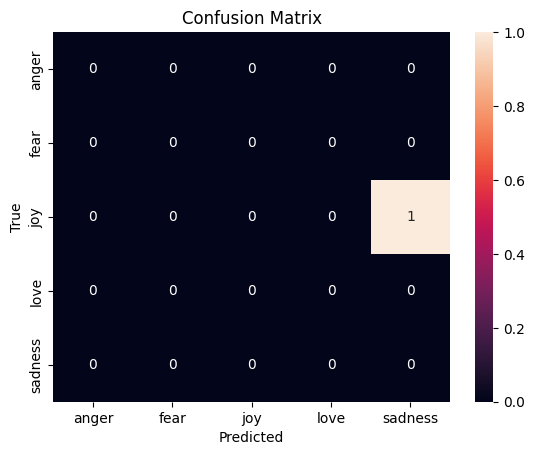

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()